In [33]:
from os import listdir
from os.path import isfile, join
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
classes = {
    'unlabled':np.uint8([[[0, 0, 0]]]), 
    'Building':np.uint8([[[70, 70, 70]]]), 
    'Fence':np.uint8([[[100, 40, 40]]]), 
    'Other':np.uint8([[[55, 90, 80]]]), 
    'Pedestrian':np.uint8([[[220, 20, 60]]]), 
    'Pole':np.uint8([[[153, 153, 153]]]), 	
    'RoadLine':np.uint8([[[157, 234, 50]]]), 
    'Road':np.uint8([[[128, 64, 128]]]), 
    'SideWalk':np.uint8([[[244, 35, 232]]]), 
    'Vegetation':np.uint8([[[107, 142, 35]]]), 
    'Vehicles':np.uint8([[[0, 0, 142]]]), 
    'Wall':np.uint8([[[102, 102, 156]]]), 
    'TrafficSign':np.uint8([[[220, 220, 0]]]), 
    'Sky':np.uint8([[[70, 130, 180]]]), 
    'Ground':np.uint8([[[81, 0, 81]]]), 
    'Bridge':np.uint8([[[150, 100, 100]]]), 
    'RailTrack':np.uint8([[[230, 150, 140]]]), 
    'GuardRail':np.uint8([[[180, 165, 180]]]), 
    'TrafficLight':np.uint8([[[250, 170, 30]]]), 
    'Static':np.uint8([[[110, 190, 160]]]), 
    'Dynamic':np.uint8([[[170, 120, 50]]]), 
    'Water':np.uint8([[[45, 60, 150]]]), 
    'Terrain':np.uint8([[[145, 170, 100]]]), 
}


In [3]:
data_path = 'data/msn/semantic'
images = [f for f in listdir(data_path) if isfile(join(data_path, f))]

In [4]:
len(images)

6881

In [5]:
sample_image = np.array(Image.open(join(data_path, images[10])).convert('RGB'))

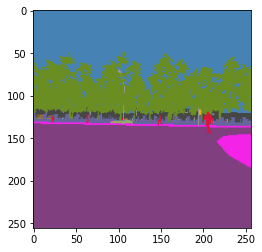

In [6]:
plt.imshow(sample_image)
plt.show()

In [28]:
def change_class(img, anchor_class, target_class):
    mask = img == anchor_class
    mask = np.tile(np.prod(mask , axis=2)[:,:,None] , (1,1,3) )
    target_image = mask * target_class + (1 - mask) * img
    return target_image

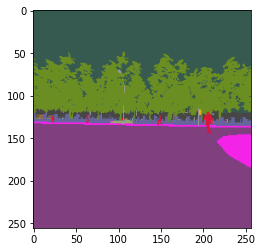

In [37]:
target_image = change_class(sample_image, classes['Sky'], classes['Other'])
plt.imshow(target_image)
plt.show()

In [30]:
anchor_classes = [
    'Fence',
                 'Pole',
                 'Vegetation',
                 'TrafficSign',
                 'GuardRail',
                 'TrafficLight',
                 'Static',
                 'Terrain',
                    'Sky']

In [31]:
target_class = 'Other'

Fence


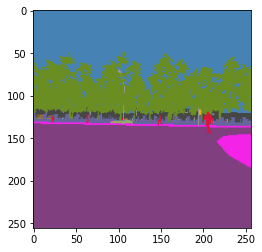

Pole


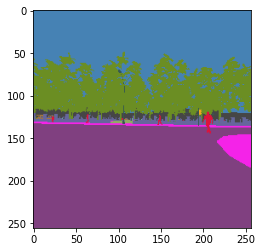

Vegetation


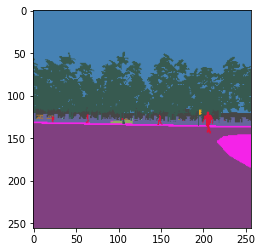

TrafficSign


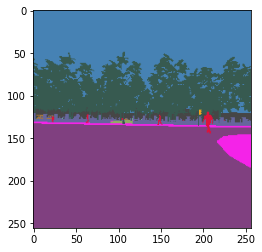

GuardRail


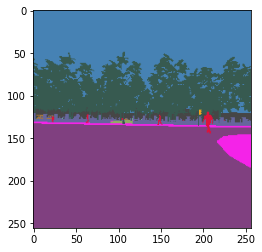

TrafficLight


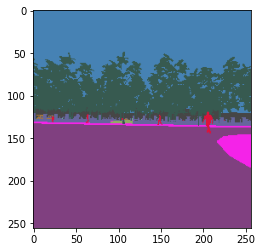

Static


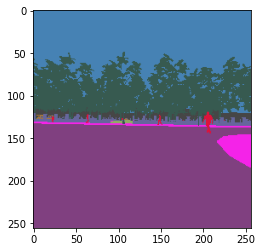

Terrain


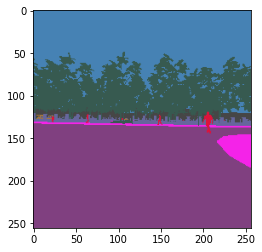

Sky


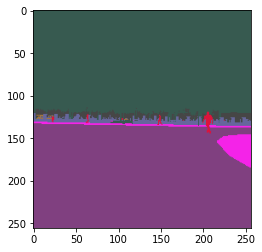

In [36]:
target_image = sample_image
for anchor_class in anchor_classes:
    target_image = change_class(target_image, classes[anchor_class], classes[target_class])
    print(anchor_class)
    plt.imshow(target_image)
    plt.show()

In [34]:
target_path = 'data/msn/semantic0'

In [43]:
# shitty slow code :))))))
for img_name in tqdm(images):
    target_image = np.array(Image.open(join(data_path, img_name)).convert("RGB"))

    for anchor_class in anchor_classes:
        target_image = change_class(target_image, classes[anchor_class], classes[target_class])
    target_image = Image.fromarray(target_image.astype(np.uint8))
    target_image.save(join(target_path, img_name))

100%|██████████| 6881/6881 [10:42<00:00, 10.71it/s]
